# COVID-19 CASES in PA #
Data Source: https://www.health.pa.gov/topics/disease/coronavirus/Pages/Archives.aspx

In [15]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

In [16]:
# Web Scraped Data from PA Department of Health
df = pd.read_csv("pa_summary.csv")
df.head(5)

,Date,Negative,Positive,Deaths
0,2020-03-31,37645,4843,63
1,2020-03-30,33777,4087,48
2,2020-03-29,30061,3394,38
3,2020-03-28,25254,2751,34
4,2020-03-27,21016,2218,22


### Assume Sum of Positive and Negative as Total Tested Population

In [17]:
# Sum of Positive and Negative as Total Tested Population
df['Tested'] = df['Positive'] + df['Negative']
df['Positive_Percent'] = round(100*df['Positive']/df['Tested'], 1)
df['Negative_Percent'] = round(100*df['Negative']/ df['Tested'], 1)
df['Death_Percent'] = round(100*df['Deaths']/ df['Tested'], 3)
df.head(5)

,Date,Negative,Positive,Deaths,Tested,Positive_Percent,Negative_Percent,Death_Percent
0,2020-03-31,37645,4843,63,42488,11.4,88.6,0.148
1,2020-03-30,33777,4087,48,37864,10.8,89.2,0.127
2,2020-03-29,30061,3394,38,33455,10.1,89.9,0.114
3,2020-03-28,25254,2751,34,28005,9.8,90.2,0.121
4,2020-03-27,21016,2218,22,23234,9.5,90.5,0.095


In [18]:
df = df.sort_values('Date', ascending = True)
df.head(5)

,Date,Negative,Positive,Deaths,Tested,Positive_Percent,Negative_Percent,Death_Percent
13,2020-03-18,1187,133,0,1320,10.1,89.9,0.000
12,2020-03-19,1608,185,0,1793,10.3,89.7,0.000
11,2020-03-20,2574,268,0,2842,9.4,90.6,0.000
10,2020-03-21,3766,371,2,4137,9.0,91.0,0.048
9,2020-03-22,4964,479,2,5443,8.8,91.2,0.037


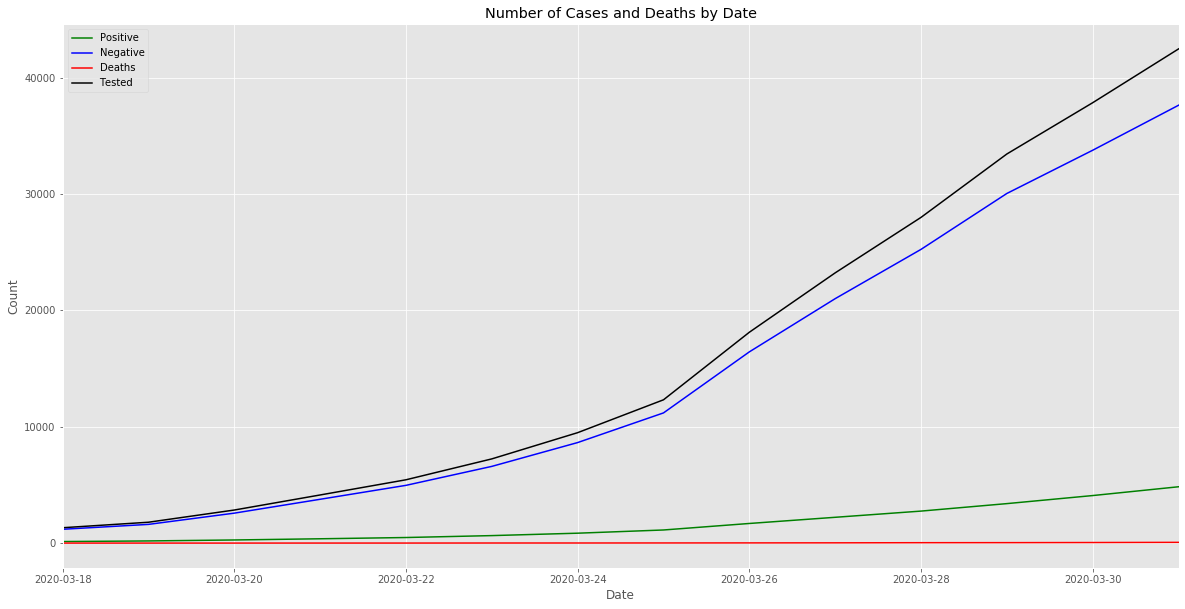

In [19]:
style.use('ggplot')
ax = plt.gca()
df.plot(kind='line',x='Date',y='Positive', color='green', ax=ax, figsize=(20,10))
df.plot(kind='line',x='Date',y='Negative', color='blue', ax=ax)
df.plot(kind='line',x='Date',y='Deaths', color='red', ax=ax)
df.plot(kind='line',x='Date',y='Tested', color='black', ax=ax)
plt.title('Number of Cases and Deaths by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [20]:
df_percent = pd.DataFrame(df, columns=['Date', 'Positive_Percent','Negative_Percent'])
df_percent.set_index("Date", inplace = True) 
df_percent.head(5)

,Positive_Percent,Negative_Percent
Date,,
2020-03-18,10.1,89.9
2020-03-19,10.3,89.7
2020-03-20,9.4,90.6
2020-03-21,9.0,91.0
2020-03-22,8.8,91.2


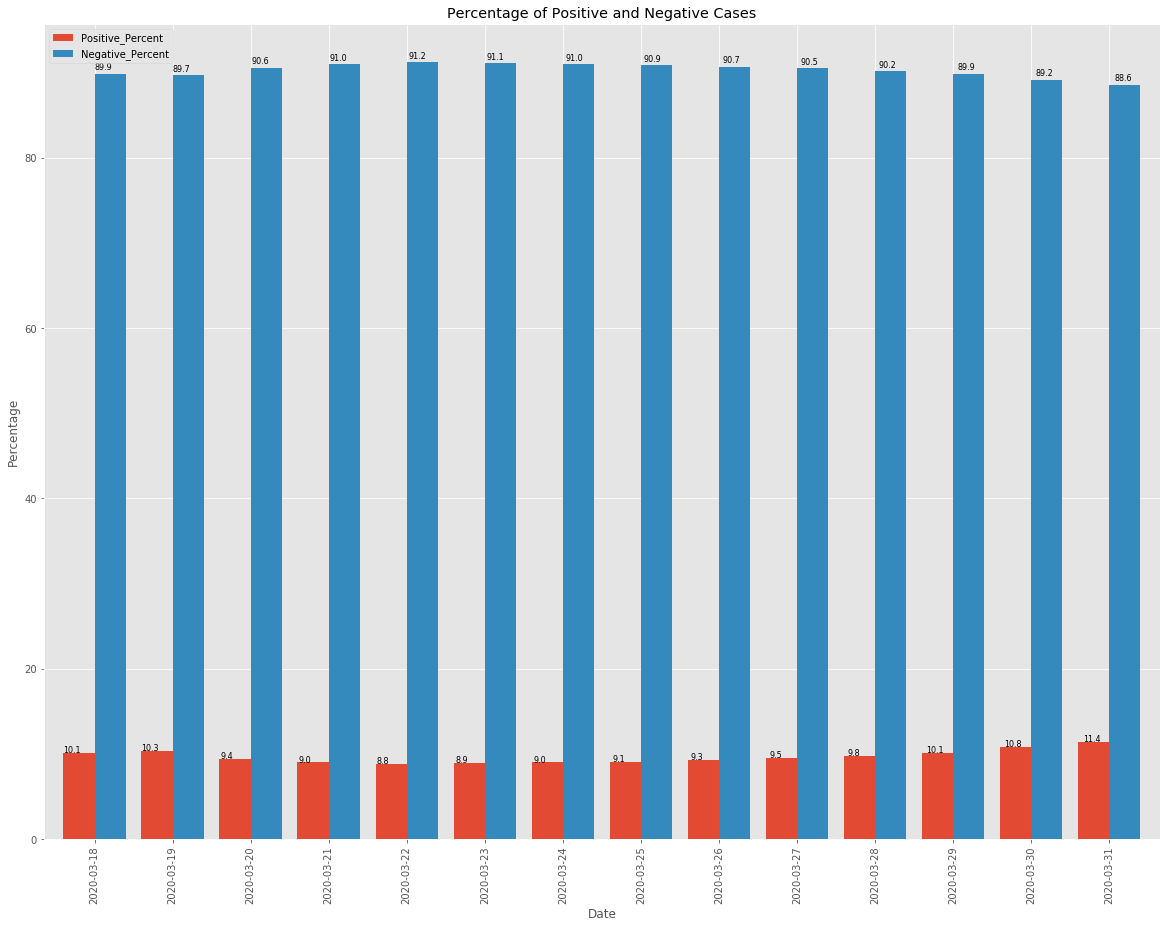

In [21]:
style.use('ggplot')
bar_chart = df_percent.plot.bar(stacked=False, width=0.8, figsize=(20,15), title="Percentage of Positive and Negative Cases")
plt.xlabel('Date')
plt.ylabel('Percentage')
bar_chart.legend(loc=2)  
for p in bar_chart.patches:
    bar_chart.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=8)
plt.show()

## Deeper Dive into Cases By County

In [22]:
# Web Scraped Data from PA Department of Health
df_counties = pd.read_csv("pa_county.csv")
df_counties.head()

,Date,County,Cases,Deaths
0,2020-03-31,Adams,9,0
1,2020-03-31,Allegheny,325,2
2,2020-03-31,Armstrong,5,0
3,2020-03-31,Beaver,52,1
4,2020-03-31,Bedford,2,0


In [23]:
county_name = 'Chester'
df_county = df_counties[df_counties['County']== county_name]
df_county = df_county.sort_values('Date', ascending = True)
df_county.head()

,Date,County,Cases,Deaths
562,2020-03-18,Chester,9,0
541,2020-03-19,Chester,10,0
516,2020-03-20,Chester,17,0
489,2020-03-21,Chester,19,0
456,2020-03-22,Chester,23,0


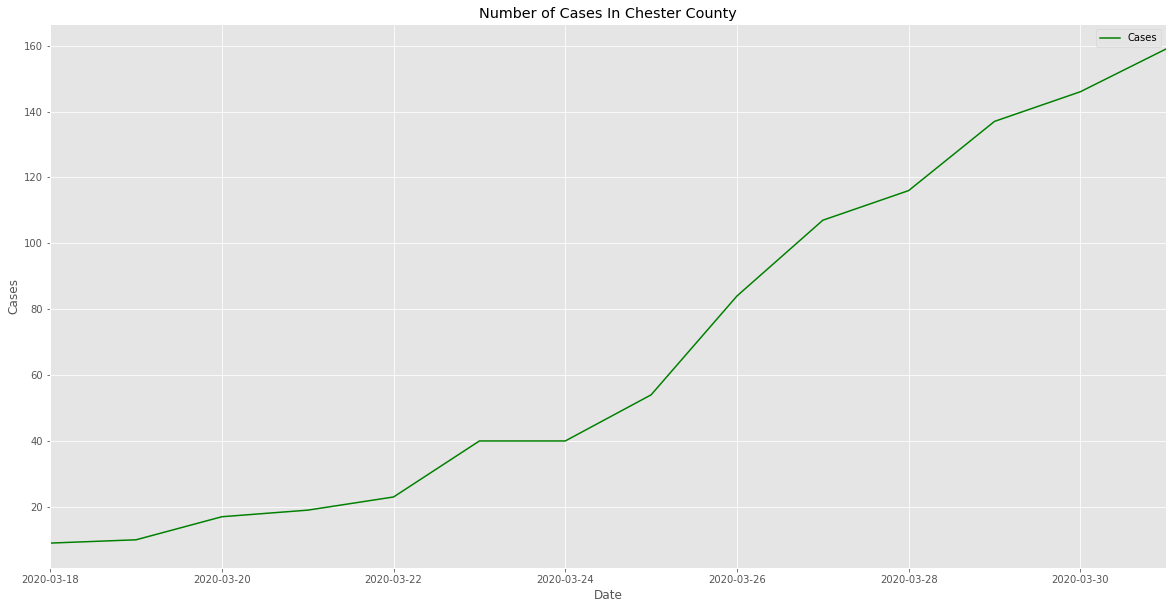

In [24]:
style.use('ggplot')
ax = plt.gca()
df_county.plot(kind='line',x='Date',y='Cases', color='green', ax=ax, figsize=(20,10))
plt.title('Number of Cases In ' + county_name +' County')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

## Select a County to See the Cases

In [25]:
# Unique County Names from Dataset
county_name_list = df_counties['County'].unique()
county_name_list = county_name_list.tolist()
county_name_list.insert(0, 'Select One')
print('Unique County Names: %d' % len(county_name_list))

Unique County Names: 61


### The following section require Jupyter Widgets to display properly

https://ipywidgets.readthedocs.io/en/latest/index.html

**Two Options to Install:**

* Conda
    * conda install -c conda-forge ipywidgets
* PIP
    * pip install ipywidgets
    * jupyter nbextension enable --py widgetsnbextension

Dropdown(description='County:', index=46, options=('Select One', 'Adams', 'Allegheny', 'Armstrong', 'Beaver', …

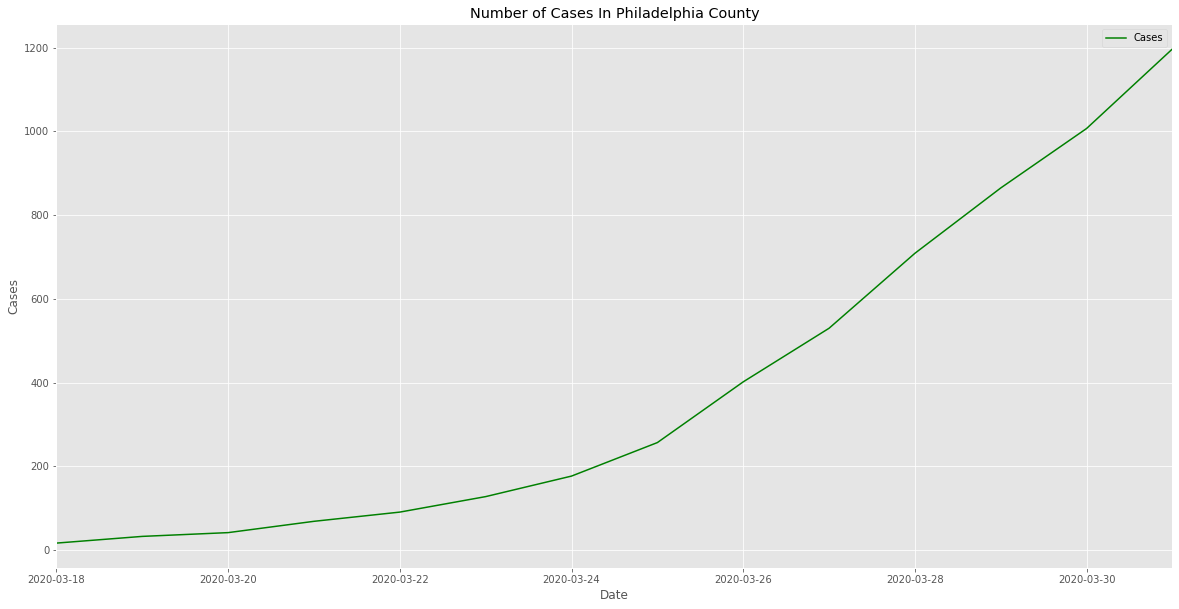

In [26]:
import ipywidgets as widgets
from IPython.display import clear_output

default_county = 'Philadelphia'
country_widget = widgets.Dropdown(
    options= county_name_list,
    value= default_county,
    description='County:',
)

def refresh_chart(county_name):
    # reset plot and widget
    clear_output(wait=True)
    display(country_widget)
    if county_name != 'Select One':
        df_counties = pd.read_csv("pa_county.csv")
        df_county = df_counties[df_counties['County'] == county_name]
        df_county = df_county.sort_values('Date', ascending = True)
        style.use('ggplot')
        ax = plt.gca()
        df_county.plot(kind='line',x='Date',y='Cases', color='green', ax=ax, figsize=(20,10))
        plt.title('Number of Cases In ' + county_name +' County')
        plt.xlabel('Date')
        plt.ylabel('Cases')
        plt.show()

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        refresh_chart(change['new'])
        
country_widget.observe(on_change)
display(country_widget)
refresh_chart(default_county)